#BUỔI 1

##Câu 1: Chèn thư viện cần thiết: (Gợi ý: pandas, numpy, matplotlib, seaborn. statistics, scipy.stats)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import scipy.stats as stats

##Câu 2: Đọc 2 file dữ liệu kết quả thi tốt nghiệp phổ thông năm 2022 và 2023 vào 2 dataframe.

In [5]:
df_1 = pd.read_csv('/content/drive/MyDrive/PTVTKDL/Dulieu/diem_thi_thpt_2022.csv')
print(df_1)

             sbd  toan  ngu_van  ngoai_ngu  vat_li  hoa_hoc  sinh_hoc  \
0        1000001   3.6     5.00        4.0     NaN      NaN       NaN   
1        1000002   8.4     6.75        7.6     NaN      NaN       NaN   
2        1000003   5.8     7.50        5.0     NaN      NaN       NaN   
3        1000004   7.4     7.50        8.6     NaN      NaN       NaN   
4        1000005   7.2     8.50        9.0     NaN      NaN       NaN   
...          ...   ...      ...        ...     ...      ...       ...   
995436  64006584   8.4     6.75        4.6     NaN      NaN       NaN   
995437  64006585   5.6     6.50        2.8     NaN      NaN       NaN   
995438  64006586   5.8     6.00        6.6     NaN      NaN       NaN   
995439  64006587   7.6     6.75        7.0     NaN      NaN       NaN   
995440  64006588   6.6     4.50        3.2     NaN      NaN       NaN   

        lich_su  dia_li  gdcd  
0          2.75    6.00  8.75  
1          8.50    7.50  8.25  
2          7.25    5.50  8.

In [6]:
df_2 = pd.read_excel('/content/drive/MyDrive/PTVTKDL/Dulieu/diem_thi_thpt_2023_dl tho.xlsx',sheet_name='diem_thi_thpt_2023')
print(df_2)

              sbd  toan  ngu_van  ngoai_ngu  vat_li  hoa_hoc  sinh_hoc  \
0         1000001   8.4     8.50        9.2     NaN      NaN       NaN   
1         1000002   7.2     8.50        9.2     NaN      NaN       NaN   
2         1000003   NaN     6.50        NaN     NaN      NaN       NaN   
3         1000004   7.8     8.25        7.8     NaN      NaN       NaN   
4         1000005   7.2     8.00        7.8     NaN      NaN       NaN   
...           ...   ...      ...        ...     ...      ...       ...   
1022055  64006933   7.8     6.75        5.4     NaN      NaN       NaN   
1022056  64006934   7.4     7.50        6.0     6.0     5.75      6.25   
1022057  64006935   6.4     7.00        3.0     NaN      NaN       NaN   
1022058  64006936   6.6     7.00        5.8     NaN      NaN       NaN   
1022059  64006937   NaN     5.00        NaN     NaN      NaN       NaN   

         lich_su  dia_li  gdcd ma_ngoai_ngu  
0           6.75    6.00  9.00           N1  
1           8.75   

##Câu 3: Thực hiện mô tả dữ liệu và ghi nhận xét (Ví dụ: Cho biết có bao nhiêu học sinh tham gia vào mỗi kỳ thi, điểm cao nhất và thấp nhất của từng môn thi trong từng năm, trung bình, trung vị. Qua đó cho biết trong 2 năm 2022-2023, kết quả thi của từng môn có sự biến thiên như thế nào?...)

In [37]:
def describe_data(df, year):
  print(f"Mô tả dữ liệu năm {year}")
  print("Số học sinh tham gia:", len(df))
  for col in df.columns[2:]:
    if pd.api.types.is_numeric_dtype(df[col]):
      print(f"Môn: {col}")
      print("Điểm cao nhất:", df[col].max())
      print("Điểm thấp nhất:", df[col].min())
      print("Điểm trung bình:", df[col].mean())
      print("Điểm trung vị:", df[col].median())
      print("Độ lệch chuẩn:", df[col].std()) # Thêm độ lệch chuẩn
      print("Phân vị 25%:", df[col].quantile(0.25)) # Thêm phân vị 25%
      print("Phân vị 75%:", df[col].quantile(0.75)) # Thêm phân vị 75%
    else:
      print(f"Bỏ qua cột {col} vì không phải kiểu dữ liệu số")

describe_data(df_1,2022)
describe_data(df_2,2023)

# So sánh sự biến thiên giữa 2 năm
print("\nSo sánh sự biến thiên giữa năm 2022 và 2023:")
for col in df_1.columns[2:]:
    if col in df_2.columns and pd.api.types.is_numeric_dtype(df_1[col]) and pd.api.types.is_numeric_dtype(df_2[col]):
        mean_2022 = df_1[col].mean()
        mean_2023 = df_2[col].mean()
        std_2022 = df_1[col].std()
        std_2023 = df_2[col].std()

        print(f"Môn {col}:")
        print(f"  Trung bình năm 2022: {mean_2022:.2f}, Trung bình năm 2023: {mean_2023:.2f}")
        print(f"  Độ lệch chuẩn năm 2022: {std_2022:.2f}, Độ lệch chuẩn năm 2023: {std_2023:.2f}")
        # Thêm so sánh bằng t-test nếu cần
        t_stat, p_val = stats.ttest_ind(df_1[col].dropna(), df_2[col].dropna()) # Sử dụng t-test để so sánh
        print(f"  T-statistic: {t_stat:.2f}, P-value: {p_val:.3f}") # In ra t-statistic và p-value
        if p_val < 0.05:
          print("  Có sự khác biệt đáng kể về điểm trung bình giữa hai năm.")
        else:
          print("  Không có sự khác biệt đáng kể về điểm trung bình giữa hai năm.")

Mô tả dữ liệu năm 2022
Số học sinh tham gia: 995441
Môn: ngu_van
Điểm cao nhất: 10.0
Điểm thấp nhất: 0.0
Điểm trung bình: 6.5077457364783395
Điểm trung vị: 6.5
Độ lệch chuẩn: 1.379601895965237
Phân vị 25%: 5.58
Phân vị 75%: 7.5
Môn: ngoai_ngu
Điểm cao nhất: 10.0
Điểm thấp nhất: 0.0
Điểm trung bình: 5.157686401128404
Điểm trung vị: 4.8
Độ lệch chuẩn: 1.9495474568318674
Phân vị 25%: 3.6
Phân vị 75%: 6.6
Môn: vat_li
Điểm cao nhất: 10.0
Điểm thấp nhất: 0.0
Điểm trung bình: 6.7237791185261875
Điểm trung vị: 7.0
Độ lệch chuẩn: 1.4419252633650625
Phân vị 25%: 5.75
Phân vị 75%: 7.75
Môn: hoa_hoc
Điểm cao nhất: 10.0
Điểm thấp nhất: 0.0
Điểm trung bình: 6.703898071583269
Điểm trung vị: 7.0
Độ lệch chuẩn: 1.6003930712214827
Phân vị 25%: 5.5
Phân vị 75%: 8.0
Môn: sinh_hoc
Điểm cao nhất: 10.0
Điểm thấp nhất: 0.0
Điểm trung bình: 5.01910859161137
Điểm trung vị: 4.75
Độ lệch chuẩn: 1.4482701031058363
Phân vị 25%: 4.0
Phân vị 75%: 6.0
Môn: lich_su
Điểm cao nhất: 10.0
Điểm thấp nhất: 0.0
Điểm trung bìn

###**Nhận xét:** Trong 2 năm 2022-2023, kết quả thi của từng môn sự biến thiên diễn ra như thế nào ?

**1. Môn Ngữ Văn:**

Điểm trung bình: Tăng từ 6.51 lên 6.86, cho thấy học sinh có kết quả tốt hơn trong năm 2023.

Độ lệch chuẩn: Giảm từ 1.38 xuống 1.33, chỉ ra rằng điểm số phân bố đều hơn xung quanh giá trị trung bình.

Phân vị 25% và 75%: Tăng từ 5.58 và 7.5 lên 6.0 và 7.75, cho thấy mức điểm khá và cao đều tăng.

T-statistic và P-value: T-statistic là -182.67 và P-value là 0.000, khẳng định sự khác biệt này có ý nghĩa thống kê.


Nhận xét: Có sự cải thiện rõ rệt về điểm số môn Ngữ Văn giữa hai năm, với điểm trung bình cao hơn và độ lệch chuẩn thấp hơn, cho thấy học sinh đạt kết quả cao hơn và phân bố điểm đồng đều hơn.

**2. Môn Ngoại Ngữ:**

Điểm trung bình: Tăng từ 5.16 lên 5.46, cho thấy kết quả thi Ngoại Ngữ của học sinh có sự cải thiện.

Độ lệch chuẩn: Tăng từ 1.95 lên 1.97, cho thấy sự biến động về điểm số tăng nhẹ.

Phân vị 25% và 75%: Tăng từ 3.6 và 6.6 lên 4.0 và 7.0, chỉ ra rằng điểm số ở phân vị thấp và cao đều tăng.

T-statistic và P-value: T-statistic là -102.98 và P-value là 0.000, chứng minh sự khác biệt này có ý nghĩa thống kê.


Nhận xét: Điểm trung bình môn Ngoại Ngữ đã tăng lên đáng kể, mặc dù sự biến động điểm số cũng tăng nhẹ, nhưng vẫn cho thấy kết quả tổng thể được cải thiện.

**3. Môn Vật Lý:**

Điểm trung bình: Giảm từ 6.72 xuống 6.57, chỉ ra rằng kết quả thi môn Vật Lý có sự suy giảm.

Độ lệch chuẩn: Tăng từ 1.44 lên 1.49, cho thấy sự biến động về điểm số tăng.

Phân vị 25% và 75%: Giảm từ 5.75 và 7.75 xuống 5.5 và 7.75, cho thấy điểm số ở mức khá giảm.

T-statistic và P-value: T-statistic là 41.34 và P-value là 0.000, khẳng định sự khác biệt này có ý nghĩa thống kê.


Nhận xét: Kết quả thi môn Vật Lý giảm nhẹ, với sự tăng nhẹ về độ biến động điểm số, cho thấy cần cải thiện phương pháp giảng dạy và học tập cho môn này.

**4. Môn Hóa Học:**

Điểm trung bình: Tăng nhẹ từ 6.70 lên 6.74, cho thấy sự cải thiện nhỏ về kết quả thi.

Độ lệch chuẩn: Giảm từ 1.60 xuống 1.43, cho thấy sự giảm thiểu về biến động điểm số.

Phân vị 25% và 75%: Tăng từ 5.5 và 8.0 lên 5.75 và 7.75, chỉ ra sự cải thiện nhẹ ở mức điểm khá và cao.

T-statistic và P-value: T-statistic là -10.88 và P-value là 0.000, chứng minh sự khác biệt này có ý nghĩa thống kê.


Nhận xét: Kết quả thi môn Hóa Học được cải thiện nhẹ, với sự giảm thiểu về độ biến động điểm số, cho thấy sự tiến bộ trong việc học tập môn này.

**5. Môn Sinh Học:**

Điểm trung bình: Tăng từ 5.02 lên 6.39, cho thấy sự cải thiện đáng kể về kết quả thi.

Độ lệch chuẩn: Giảm từ 1.45 xuống 1.21, chỉ ra rằng sự biến động điểm số giảm.

Phân vị 25% và 75%: Tăng từ 4.0 và 6.0 lên 5.5 và 7.25, cho thấy sự cải thiện rõ rệt ở mức điểm thấp và khá.

T-statistic và P-value: T-statistic là -415.18 và P-value là 0.000, khẳng định sự khác biệt này có ý nghĩa thống kê.


Nhận xét: Môn Sinh Học có sự cải thiện đáng kể về điểm trung bình, với sự giảm thiểu về biến động điểm số, cho thấy sự tiến bộ vượt bậc trong học tập.

**6. Môn Lịch Sử:**

Điểm trung bình: Giảm từ 6.34 xuống 6.03, cho thấy sự giảm nhẹ về kết quả thi.

Độ lệch chuẩn: Giảm từ 1.61 xuống 1.55, chỉ ra rằng sự biến động điểm số giảm.

Phân vị 25% và 75%: Giảm từ 5.25 và 7.5 xuống 5.0 và 7.25, cho thấy điểm số ở mức khá và cao giảm.

T-statistic và P-value: T-statistic là 116.52 và P-value là 0.000, chứng minh sự khác biệt này có ý nghĩa thống kê.


Nhận xét: Môn Lịch Sử có sự giảm nhẹ về điểm trung bình và sự giảm thiểu về biến động điểm số, cho thấy cần cải thiện phương pháp học tập và giảng dạy.

**7. Môn Địa Lý:**

Điểm trung bình: Giảm từ 6.68 xuống 6.15, cho thấy sự giảm nhẹ về kết quả thi.

Độ lệch chuẩn: Giảm từ 1.22 xuống 1.17, chỉ ra rằng sự biến động điểm số giảm.

Phân vị 25% và 75%: Giảm từ 5.75 và 7.5 xuống 5.5 và 7.0, cho thấy điểm số ở mức khá và cao giảm.

T-statistic và P-value: T-statistic là 257.53 và P-value là 0.000, khẳng định sự khác biệt này có ý nghĩa thống kê.


Nhận xét: Môn Địa Lý có sự giảm nhẹ về điểm trung bình và sự giảm thiểu về biến động điểm số, cho thấy cần tập trung cải thiện phương pháp giảng dạy và học tập.

**8. Môn Giáo Dục Công Dân:**

Điểm trung bình: Tăng từ 8.03 lên 8.29, cho thấy sự cải thiện về kết quả thi.

Độ lệch chuẩn: Tăng từ 1.07 lên 1.14, cho thấy sự tăng nhẹ về biến động điểm số.

Phân vị 25% và 75%: Tăng từ 7.5 và 8.75 lên 7.75 và 9.25, cho thấy sự cải thiện rõ rệt ở mức điểm cao.

T-statistic và P-value: T-statistic là -121.09 và P-value là 0.000, chứng minh sự khác biệt này có ý nghĩa thống kê.


Nhận xét: Môn Giáo Dục Công Dân có sự cải thiện về điểm trung bình và sự tăng nhẹ về biến động điểm số, cho thấy học sinh đạt kết quả tốt hơn và phân bố điểm đồng đều hơn.



###**Nhận xét:** Điểm số năm 2022

###**Nhận xét:** Điểm số năm 2023

##Câu 4: Thống kê có bao nhiêu sinh viên/tổng số sinh viên không dự thi (không có điểm) trong từng môn ở từng năm trong 2 dataset trên.

In [34]:
def thisinh_vang(df, year):
    print(f"Thống kê sinh viên không dự thi năm {year}")
    for col in df.columns[2:]:
        if pd.api.types.is_numeric_dtype(df[col]):
            missing_count = df[col].isnull().sum()
            total_students = len(df)
            print(f"Môn {col}: {missing_count} / {total_students} sinh viên không có điểm")
        else:
            print(f"Bỏ qua cột {col} vì không phải kiểu dữ liệu số")

thisinh_vang(df_1, 2022)
thisinh_vang(df_2, 2023)

Thống kê sinh viên không dự thi năm 2022
Môn ngu_van: 14034 / 995441 sinh viên không có điểm
Môn ngoai_ngu: 124832 / 995441 sinh viên không có điểm
Môn vat_li: 669918 / 995441 sinh viên không có điểm
Môn hoa_hoc: 668074 / 995441 sinh viên không có điểm
Môn sinh_hoc: 673243 / 995441 sinh viên không có điểm
Môn lich_su: 335779 / 995441 sinh viên không có điểm
Môn dia_li: 338020 / 995441 sinh viên không có điểm
Môn gdcd: 441098 / 995441 sinh viên không có điểm
Thống kê sinh viên không dự thi năm 2023
Môn ngu_van: 13821 / 1022060 sinh viên không có điểm
Môn ngoai_ngu: 141063 / 1022060 sinh viên không có điểm
Môn vat_li: 694871 / 1022060 sinh viên không có điểm
Môn hoa_hoc: 693942 / 1022060 sinh viên không có điểm
Môn sinh_hoc: 697435 / 1022060 sinh viên không có điểm
Môn lich_su: 338613 / 1022060 sinh viên không có điểm
Môn dia_li: 339926 / 1022060 sinh viên không có điểm
Môn gdcd: 456608 / 1022060 sinh viên không có điểm
Bỏ qua cột ma_ngoai_ngu vì không phải kiểu dữ liệu số


##Câu 5: Vẽ biểu đồ boxplot cho điểm thi môn Giáo dục công dân năm 2023

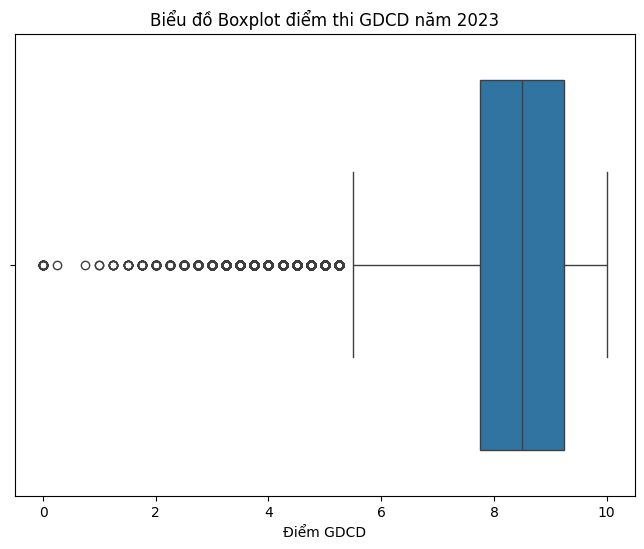

In [23]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_2['gdcd'])
plt.title('Biểu đồ Boxplot điểm thi GDCD năm 2023')
plt.xlabel('Điểm GDCD')
plt.show()

##Câu 6: Tách dataframe cho dữ liệu học sinh thuộc tỉnh Trà Vinh trong năm 2023

In [27]:
df_hstv23 = df_2[df_2['sbd'].astype(str).str[:2] == '58']
print(df_hstv23)

             sbd  toan  ngu_van  ngoai_ngu  vat_li  hoa_hoc  sinh_hoc  \
965655  58000001   5.0     8.25        5.4     NaN      NaN       NaN   
965656  58000002   6.0     6.75        3.4     NaN      NaN       NaN   
965657  58000003   5.2     7.00        3.2     NaN      NaN       NaN   
965658  58000004   7.6     7.75        7.6    5.75     7.50       7.5   
965659  58000005   4.6     7.00        NaN     NaN      NaN       NaN   
...          ...   ...      ...        ...     ...      ...       ...   
974846  58009192   4.8     7.25        4.0     NaN      NaN       NaN   
974847  58009193   4.8     7.50        3.4     NaN      NaN       NaN   
974848  58009194   4.6     6.00        3.8     NaN      NaN       NaN   
974849  58009195   4.0     6.50        3.4     NaN      NaN       NaN   
974850  58009196   3.2     5.00        3.2    2.50     2.75       3.5   

        lich_su  dia_li  gdcd ma_ngoai_ngu  
965655     5.75    5.50  9.50           N1  
965656     4.50    6.00  7.25    

##Câu 7: Tách dataframe cho dữ liệu học sinh thi môn ngoại ngữ là tiếng Anh trong năm 2022

In [32]:
df_hsnna22 = df_1[df_1['ngoai_ngu'] > 0]
print(df_hsnna22)

             sbd  toan  ngu_van  ngoai_ngu  vat_li  hoa_hoc  sinh_hoc  \
0        1000001   3.6     5.00        4.0     NaN      NaN       NaN   
1        1000002   8.4     6.75        7.6     NaN      NaN       NaN   
2        1000003   5.8     7.50        5.0     NaN      NaN       NaN   
3        1000004   7.4     7.50        8.6     NaN      NaN       NaN   
4        1000005   7.2     8.50        9.0     NaN      NaN       NaN   
...          ...   ...      ...        ...     ...      ...       ...   
995436  64006584   8.4     6.75        4.6     NaN      NaN       NaN   
995437  64006585   5.6     6.50        2.8     NaN      NaN       NaN   
995438  64006586   5.8     6.00        6.6     NaN      NaN       NaN   
995439  64006587   7.6     6.75        7.0     NaN      NaN       NaN   
995440  64006588   6.6     4.50        3.2     NaN      NaN       NaN   

        lich_su  dia_li  gdcd  
0          2.75    6.00  8.75  
1          8.50    7.50  8.25  
2          7.25    5.50  8.

##Câu 7.5: Tách dataframe cho dữ liệu học sinh thi môn ngoại ngữ là tiếng Anh trong năm 2023

In [35]:
df_hsnna23 = df_2[df_2['ma_ngoai_ngu'] == 'N1']
print(df_hsnna23)

              sbd  toan  ngu_van  ngoai_ngu  vat_li  hoa_hoc  sinh_hoc  \
0         1000001   8.4     8.50        9.2     NaN      NaN       NaN   
1         1000002   7.2     8.50        9.2     NaN      NaN       NaN   
3         1000004   7.8     8.25        7.8     NaN      NaN       NaN   
4         1000005   7.2     8.00        7.8     NaN      NaN       NaN   
5         1000006   7.6     9.25        9.0     NaN      NaN       NaN   
...           ...   ...      ...        ...     ...      ...       ...   
1022054  64006932   6.6     7.75        6.0    5.75     7.00      8.25   
1022055  64006933   7.8     6.75        5.4     NaN      NaN       NaN   
1022056  64006934   7.4     7.50        6.0    6.00     5.75      6.25   
1022057  64006935   6.4     7.00        3.0     NaN      NaN       NaN   
1022058  64006936   6.6     7.00        5.8     NaN      NaN       NaN   

         lich_su  dia_li  gdcd ma_ngoai_ngu  
0           6.75    6.00  9.00           N1  
1           8.75   

##Câu 8: Thực hiện vẽ biểu đồ phù hợp cho điểm số của một môn học nào đó trong dataframe dữ liệu thi của tỉnh Trà Vinh và cho nhận xét

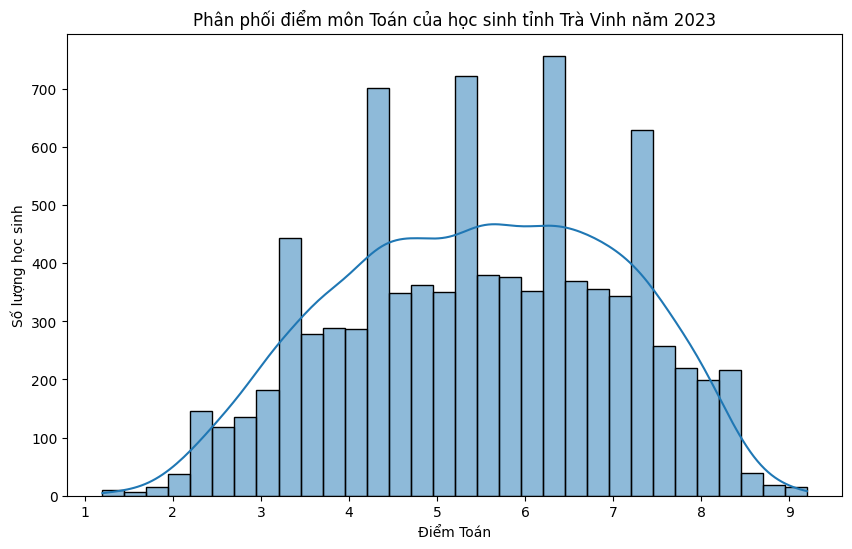

Thống kê mô tả điểm Toán của học sinh tỉnh Trà Vinh năm 2023:
count    8960.000000
mean        5.477165
std         1.574066
min         1.200000
25%         4.200000
50%         5.600000
75%         6.800000
max         9.200000
Name: toan, dtype: float64


In [38]:
plt.figure(figsize=(10, 6))
sns.histplot(df_hstv23['toan'], kde=True)  # Sử dụng kde=True để hiển thị đường mật độ
plt.title('Phân phối điểm môn Toán của học sinh tỉnh Trà Vinh năm 2023')
plt.xlabel('Điểm Toán')
plt.ylabel('Số lượng học sinh')
plt.show()

print(f"Thống kê mô tả điểm Toán của học sinh tỉnh Trà Vinh năm 2023:")
print(df_hstv23['toan'].describe())

###**Nhận xét:** Quan sát biểu đồ histogram, ta có thể nhận xét về sự phân bố điểm môn Toán của học sinh tỉnh Trà Vinh năm 2023.
* Điểm số tập trung chủ yếu xung quanh khoảng 6.
* Các thanh theo đường phân phối được fit chặt chẽ, dữ liệu phù hợp với phân phối tốt. Suy ra: Có dạng Good fit.
* Phần nhiều học sinh đạt điểm trung bình.
* Độ phân tán: Các cột có độ cao khác nhau, cho thấy có sự phân tán nhất định. Tuy nhiên, độ phân tán không quá lớn, tập trung chủ yếu trong khoảng 5 đến 8 điểm.
* Hình dạng gần giống với đường cong hình chuông cho thấy có xu hướng phân bố chuẩn (normal distribution).
* Độ lệch có đường cong không hoàn toàn đối xứng, có phần đuôi kéo dài về phía điểm số cao hơn, Cho thấy một số lượng nhỏ học sinh đạt điểm rất cao.
* Dựa vào hình dạng này có thể cho thấy học sinh nắm vững kiến thức và có kết quả tương đối đồng đều.





##Câu 9: Tách dataframe cho dữ liệu học sinh thuộc tỉnh Trà Vinh trong năm 2022

In [39]:
df_hstv22 = df_2[df_2['sbd'].astype(str).str[:2] == '58']
print(df_hstv22)

             sbd  toan  ngu_van  ngoai_ngu  vat_li  hoa_hoc  sinh_hoc  \
965655  58000001   5.0     8.25        5.4     NaN      NaN       NaN   
965656  58000002   6.0     6.75        3.4     NaN      NaN       NaN   
965657  58000003   5.2     7.00        3.2     NaN      NaN       NaN   
965658  58000004   7.6     7.75        7.6    5.75     7.50       7.5   
965659  58000005   4.6     7.00        NaN     NaN      NaN       NaN   
...          ...   ...      ...        ...     ...      ...       ...   
974846  58009192   4.8     7.25        4.0     NaN      NaN       NaN   
974847  58009193   4.8     7.50        3.4     NaN      NaN       NaN   
974848  58009194   4.6     6.00        3.8     NaN      NaN       NaN   
974849  58009195   4.0     6.50        3.4     NaN      NaN       NaN   
974850  58009196   3.2     5.00        3.2    2.50     2.75       3.5   

        lich_su  dia_li  gdcd ma_ngoai_ngu  
965655     5.75    5.50  9.50           N1  
965656     4.50    6.00  7.25    

##Câu 10: Thực hiện vẽ biểu đồ so sánh về sự biến thiên điểm số giữa 2 năm 2022 và 2023 của học sinh thuộc tỉnh Trà Vinh và cho nhận xét